In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:

pip install xlrd


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_excel('/kaggle/input/superstore-sale-data/Sample - Superstore.xls')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2021-103800,2021-01-03,2021-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2021-112326,2021-01-04,2021-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2021-112326,2021-01-04,2021-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2021-112326,2021-01-04,2021-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2021-141817,2021-01-05,2021-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [5]:
df.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Country/Region            object
City                      object
State/Province            object
Postal Code               object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
dtype: object

In [6]:
df['Order Date']= pd.to_datetime(df['Order Date'])
df['month_name'] = df['Order Date'].dt.month
df['year']= df['Order Date'].dt.year


<Axes: xlabel='year,month_name'>

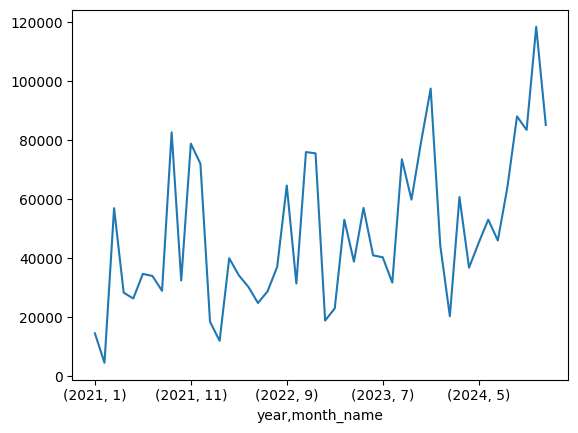

In [7]:
df.groupby(['year','month_name'])['Sales'].sum().plot()

In [8]:


df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month_name,year
0,1,US-2021-103800,2021-01-03,2021-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,1,2021
1,2,US-2021-112326,2021-01-04,2021-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,1,2021
2,3,US-2021-112326,2021-01-04,2021-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,1,2021
3,4,US-2021-112326,2021-01-04,2021-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,1,2021
4,5,US-2021-141817,2021-01-05,2021-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,1,2021


In [9]:
sales = df.groupby(['year', 'month_name'])[['Sales']].sum()
sales.reset_index(inplace = True)

In [10]:
sales['date'] = pd.to_datetime( sales['month_name'].astype(str) + '/' + sales['year'].astype(str))

sales['formatted_date'] = sales['date'].dt.strftime('%d, %B, %Y')

sales.set_index('date',inplace=True)

/tmp/ipykernel_18/1727382106.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales['date'] = pd.to_datetime( sales['month_name'].astype(str) + '/' + sales['year'].astype(str))


In [11]:
sales.head()

,year,month_name,Sales,formatted_date
date,,,,
2021-01-01,2021,1,14518.055,"01, January, 2021"
2021-02-01,2021,2,4519.892,"01, February, 2021"
2021-03-01,2021,3,56933.909,"01, March, 2021"
2021-04-01,2021,4,28295.345,"01, April, 2021"
2021-05-01,2021,5,26319.767,"01, May, 2021"


In [12]:
ts = sales[['Sales']]
ts.head()

,Sales
date,
2021-01-01,14518.055
2021-02-01,4519.892
2021-03-01,56933.909
2021-04-01,28295.345
2021-05-01,26319.767


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='Sales'>

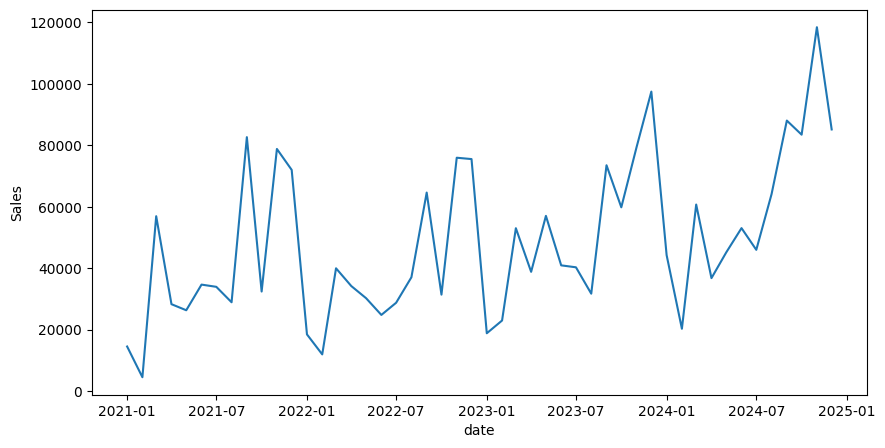

In [13]:
plt.figure(figsize=(10,5))
sns.lineplot(data=ts,x=ts.index,y=ts.Sales)

In [14]:
def test_stationarity(dataFrame, var):
    dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
    dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()
    
    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(dataFrame[var],autolag='AIC')
    stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
    print(stats)
    
    for key, values in adfTest[4].items():
        print('criticality',key,":",values)
        
    sns.lineplot(data=dataFrame,x=dataFrame.index,y=var)
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollMean')
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollStd')

/tmp/ipykernel_18/86158671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
/tmp/ipykernel_18/86158671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()


Test Statistic                 -4.437507
p-value                         0.000255
#lags used                      0.000000
number of observations used    47.000000
dtype: float64
criticality 1% : -3.5778480370438146
criticality 5% : -2.925338105429433
criticality 10% : -2.6007735310095064


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

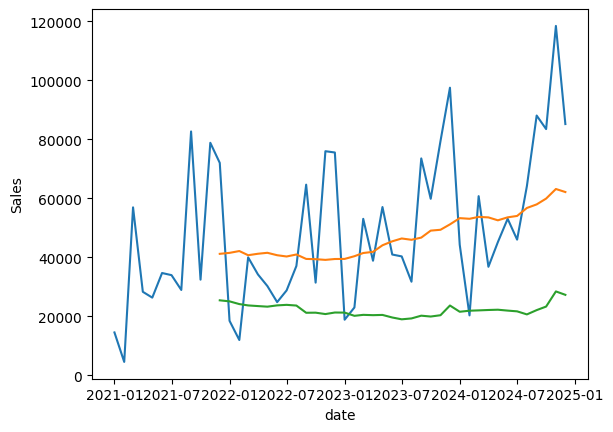

In [15]:
test_stationarity(ts,'Sales')

In [16]:
ts['diff1'] = ts['Sales'].diff(1)
ts.tail()

,Sales,rollMean,rollStd,diff1
date,,,,
2024-08-01,64129.7580,56722.132075,20632.320625,18140.2620
2024-09-01,88064.5320,57934.037833,22084.787871,23934.7740
2024-10-01,83474.7832,59904.353017,23291.164751,-4589.7488
2024-11-01,118454.5050,63157.897950,28425.034733,34979.7218
2024-12-01,85175.0328,62130.627600,27270.301924,-33279.4722


/tmp/ipykernel_18/86158671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
/tmp/ipykernel_18/86158671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.optio

Test Statistic                -8.956570e+00
p-value                        8.442763e-15
#lags used                     1.000000e+01
number of observations used    2.600000e+01
dtype: float64
criticality 1% : -3.7112123008648155
criticality 5% : -2.981246804733728
criticality 10% : -2.6300945562130176


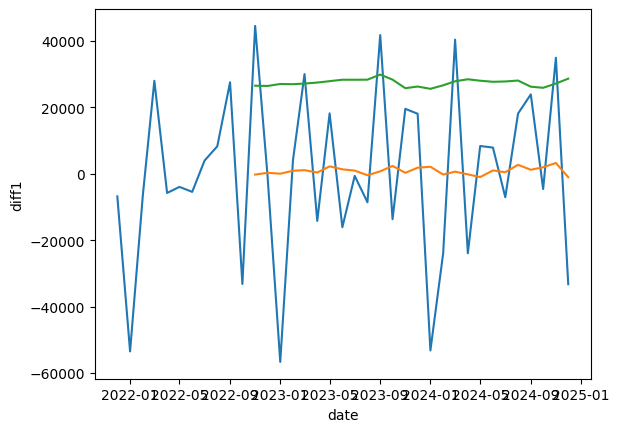

In [17]:
test_stationarity(ts.dropna(),'diff1')

In [18]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

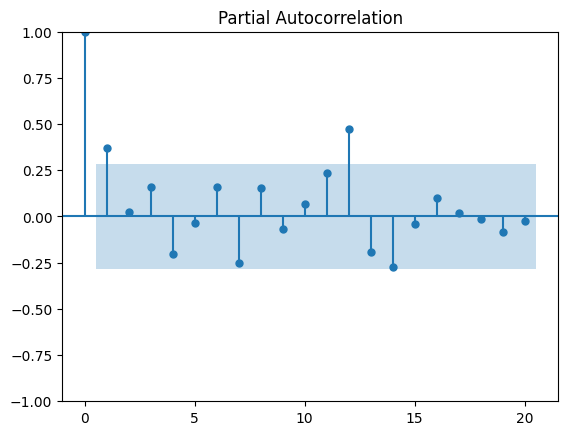

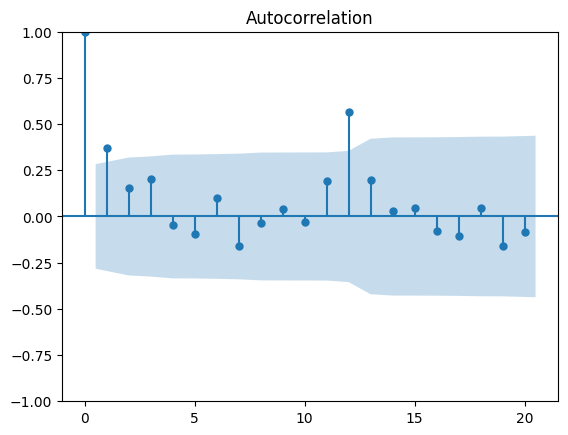

In [19]:
plot_pacf(ts['Sales'].dropna(),lags=20);
plot_acf(ts['Sales'].dropna(),lags=20);

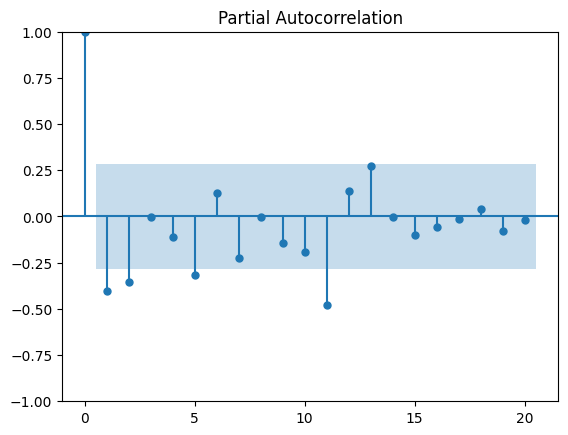

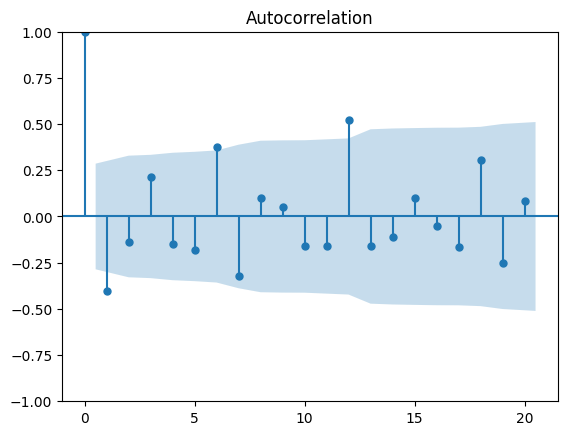

In [20]:
plot_pacf(ts['diff1'].dropna(),lags=20);
plot_acf(ts['diff1'].dropna(),lags=20);

In [21]:
train = ts[:round(len(ts)*70/100)]
test = ts[round(len(ts)*70/100):]
test.head()

,Sales,rollMean,rollStd,diff1
date,,,,
2023-11-01,79411.9658,49330.321683,20354.295084,19580.9648
2023-12-01,97502.2770,51161.131667,23647.080086,18090.3112
2024-01-01,44259.2140,53280.205250,21531.158150,-53243.0630
2024-02-01,20301.1334,53057.065117,21884.710135,-23958.0806
2024-03-01,60728.4808,53698.516100,21996.401245,40427.3474


In [22]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['Sales'],order=(1,0,1))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
ts['arimaPred'] = prediction
ts.tail()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

,Sales,rollMean,rollStd,diff1,arimaPred
date,,,,,
2024-08-01,64129.7580,56722.132075,20632.320625,18140.2620,41295.724042
2024-09-01,88064.5320,57934.037833,22084.787871,23934.7740,41295.640233
2024-10-01,83474.7832,59904.353017,23291.164751,-4589.7488,41295.673642
2024-11-01,118454.5050,63157.897950,28425.034733,34979.7218,41295.660324
2024-12-01,85175.0328,62130.627600,27270.301924,-33279.4722,41295.665633


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: xlabel='date', ylabel='Sales'>

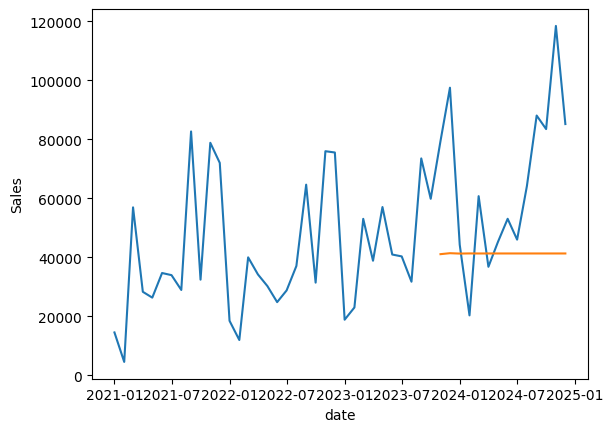

In [23]:
ts.dropna()
sns.lineplot(data=ts,x=ts.index,y='Sales')
sns.lineplot(data=ts,x=ts.index,y='arimaPred')

In [24]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test['Sales'],prediction))

35866.93748630797

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['Sales'],order=(1,0,1),seasonal_order=(3,1,2,12))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
ts['sarimaxPred'] = prediction

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observation

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.01352D+00    |proj g|=  9.60099D-01

At iterate    5    f=  6.87386D+00    |proj g|=  3.17642D-03

At iterate   10    f=  6.87384D+00    |proj g|=  9.53530D-03

At iterate   15    f=  6.87379D+00    |proj g|=  2.11204D-02

At iterate   20    f=  6.87348D+00    |proj g|=  5.69152D-02

At iterate   25    f=  6.87301D+00    |proj g|=  2.92281D-02

At iterate   30    f=  6.86999D+00    |proj g|=  1.44095D-01

At iterate   35    f=  6.85553D+00    |proj g|=  4.87307D-02

At iterate   40    f=  6.83444D+00    |proj g|=  8.66833D-02

At iterate   45    f=  6.82149D+00    |proj g|=  3.13654D-02

At iterate   50    f=  6.81913D+00    |proj g|=  1.27543D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: xlabel='date', ylabel='Sales'>

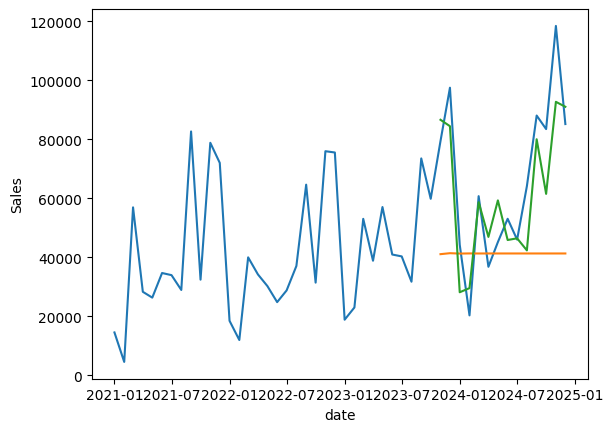

In [26]:
ts.dropna()
sns.lineplot(data=ts,x=ts.index,y='Sales')
sns.lineplot(data=ts,x=ts.index,y='arimaPred')
sns.lineplot(data=ts,x=ts.index,y='sarimaxPred')

In [27]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test['Sales'],prediction))

13745.255397236893

In [28]:
futureDate = pd.DataFrame(pd.date_range(start='2024-11-01', end='2027-12-01',freq='MS'),columns=['Dates'])
futureDate.set_index('Dates',inplace=True)
futureDate.head()

""
Dates
2024-11-01
2024-12-01
2025-01-01
2025-02-01
2025-03-01


In [29]:
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1])

2024-11-01     92714.540775
2024-12-01     91037.905956
2025-01-01     34941.534713
2025-02-01     37020.703756
2025-03-01     66764.426737
2025-04-01     54059.596114
2025-05-01     68047.575034
2025-06-01     53937.166256
2025-07-01     54134.868908
2025-08-01     48695.350675
2025-09-01     87888.160601
2025-10-01     70369.143174
2025-11-01    100585.843883
2025-12-01     98693.763963
2026-01-01     42129.257883
2026-02-01     44024.751988
2026-03-01     73236.117882
2026-04-01     61023.980577
2026-05-01     74475.836306
2026-06-01     60470.963853
2026-07-01     60792.730425
2026-08-01     55842.099641
2026-09-01     94196.500221
2026-10-01     76616.446474
2026-11-01    106931.791999
2026-12-01    105144.378539
2027-01-01     49010.526603
2027-02-01     50928.582969
2027-03-01     80636.894380
2027-04-01     68000.419995
2027-05-01     81692.485296
2027-06-01     67672.094663
2027-07-01     67898.307418
2027-08-01     62637.378835
2027-09-01    101649.944586
2027-10-01     83846

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: xlabel='date', ylabel='Sales'>

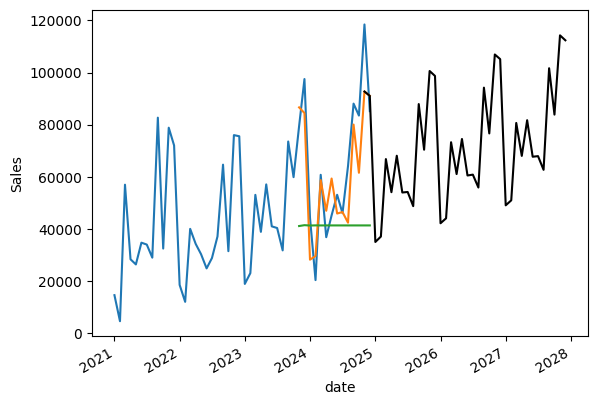

In [30]:
ts.dropna()
sns.lineplot(data=ts,x=ts.index,y='Sales')
sns.lineplot(data=ts,x=ts.index,y='sarimaxPred')
sns.lineplot(data=ts,x=ts.index,y='arimaPred')
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]).plot(color='black')